# Modules

In [1]:
import random
import statistics
import matplotlib.pyplot as plt


# Parametrizing the experiments

In [2]:
TARGET = 100 # Target "smartness" for our population
POP_SIZE = 40 # The size of the population at the start of each iteration (keep this even, if you change it)
INIT_MIN_SMART = 1 # The minimum smartness of a dog at ITER 0
INIT_MAX_SMART = 10 # The maximum smartness of a dog at ITER 0
INIT_MODE_SMART = 3 # The most comon smartness value of a dog at ITER 0
MUTATE_ODDS = 0.01 # Probability of mutation for a new puppy
MUTATE_MIN_FACTOR = 0.4 # Lower bound for the  product factor we multuply smartness for, if mutation happens
MUTATE_MAX_FACTOR = 1.3 # Upper bound for the  product factor we multuply smartness for, if mutation happens
LITTER_SIZE = 5 # Puppies born from each pair of adult dogs
MAX_ITER = 1000 # Max number of iterations

# Population
Generate population of a fixed size with a 50/50 gender split ratio, of dogs with a given initial smartness factor according to parameters.

In [3]:
def population(psize = POP_SIZE, imin = INIT_MIN_SMART, imx = INIT_MAX_SMART , imod = INIT_MODE_SMART):
    
    m = []  # male list
    f = []  # female list
    
    m = [int(random.triangular(imin,imx,imod)) for _ in range(int(psize/2))]  #Return a random number between, and included, min and mx, but most likely closer imod 
    f = [int(random.triangular(imin,imx,imod)) for _ in range(int(psize/2))] 
    
    return m,f

# Measure the fitness of the entire population

In [9]:
def fitness(m,f):

    med = round(statistics.mean(m+f),3)  # m+f :  list Concatenation
   
    return med

# Generate the new offspring
Assume that 
 - given a pair of parent dogs, a new puppy smartness will lie in that same min-max range.
 - in order to replicate what would happen in nature, we should not assume that smarter dogs pair with smarter dogs.
 - each pair breed as many puppies as the litter size parameter indicates.



In [15]:
def new_offspring(m, f, lz = LITTER_SIZE):

   random.shuffle(m) # reorganize the order of the list items
   random.shuffle(f)
   #print(m,f) 

   #new_pupp = [random.randint(min(m[i],f[i]), max(m[i],f[i])) for i in range(len(m))]  # line for one puppy  ||*|| range(len(m) == range(0, 20)
   new_pupp = [random.randint(min(m[i],f[i]), max(m[i],f[i])) for i in range(len(m)) for _ in range(lz)] # line for LITTER_SIZE  puppy
   
   return new_pupp

# Mutate the set of offspring
A small percentage of the puppies should undergo mutation. This could either lead to a lower or a higher smartness value;
since their base value is directly multiplied with a random value in the closed range [MUTATE_MIN_FACTOR, MUTATE_MAX_FACTOR].

In [16]:
def mutate(np, mo = MUTATE_ODDS, mminf = MUTATE_MIN_FACTOR, mmaxf = MUTATE_MAX_FACTOR):

    for i in range(len(np)):

      if round(random.random(),2) < mo: # Probability of mutation for a new puppy is given by factor MUTATE_ODDS
      
           np[i] = int((np[i] * random.uniform(mminf,mmaxf)) )
           print(f' The number : {i} of this generation has been mutated. Now get value : {np[i]} ')
     
    return np

# Select the best candidates

At each iteration, we have to resize our current population down to its initial size, preserving only the smartest dogs available for the next iteration. We have to make sure to keep also the initial gender split ratio.

In [24]:
def select(sp,psize = POP_SIZE):
    
    newm = []
    newf = []
    
    
    random.shuffle(sp)
    #print(sp)

    newm = sp[:len(sp)//2] 
    newf = sp[len(sp)//2:] 
    
    #print(newm,newf)

    newm.sort(reverse=True)
    newf.sort(reverse=True)    
     
    #print(newm,newf)

    del newm[psize:]  # delete all the minor values of the sorted list ensuring the required size POP_SIZE 
    del newf[psize:]

    #print(newm,newf)
    
    return newm, newf

# Main

In [35]:
def main():
  
  cnt = 0
  med = 0
  dm = []
  df = []
  b  = []

  g_cnt = 0  # used to make a graph
  g_med = []

  dm,df = population()

  while (med < float(TARGET)) or (cnt == MAX_ITER):
    
    med = fitness(dm,df)
    cnt +=1
    g_med.append(med)
    print(f'Generation : {cnt}   ---   Fitness value : {med}')
    
    b = new_offspring(dm,df)
    b = mutate(b)
    dm,df = select(b)
    print("")

  g_cnt = cnt
  

  return  g_cnt,g_med

Generation : 1   ---   Fitness value : 4.15

Generation : 2   ---   Fitness value : 4.537

Generation : 3   ---   Fitness value : 5.975

Generation : 4   ---   Fitness value : 6.55

Generation : 5   ---   Fitness value : 7.213

Generation : 6   ---   Fitness value : 7.513

Generation : 7   ---   Fitness value : 8

Generation : 8   ---   Fitness value : 8

Generation : 9   ---   Fitness value : 8

Generation : 10   ---   Fitness value : 8.012

Generation : 11   ---   Fitness value : 8.037

Generation : 12   ---   Fitness value : 8.125

Generation : 13   ---   Fitness value : 8.325

Generation : 14   ---   Fitness value : 8.8

Generation : 15   ---   Fitness value : 9.037

Generation : 16   ---   Fitness value : 9.088

Generation : 17   ---   Fitness value : 9.162

Generation : 18   ---   Fitness value : 9.425

Generation : 19   ---   Fitness value : 9.988

Generation : 20   ---   Fitness value : 10

Generation : 21   ---   Fitness value : 10

Generation : 22   ---   Fitness value : 10



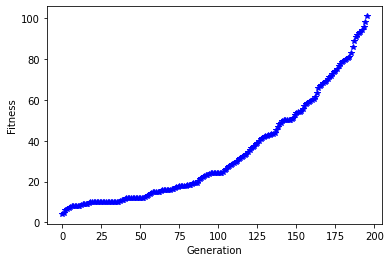

In [36]:
if __name__ == '__main__':
    g_cnt,g_med = main()

    plt.plot(range(g_cnt),g_med , 'b*')
    plt.xlabel("Generation") 
    plt.ylabel("Fitness")
    plt.show()

# Performance profiling

In [28]:
# Additional modules and setup for advanced profiling later on
!pip install line_profiler
!pip install memory_profiler
%load_ext line_profiler
%load_ext memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 673 kB 4.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The codes below relieves the pricipal code from the various `print`, and Graph

In [29]:
def mutate(np, mo = MUTATE_ODDS, mminf = MUTATE_MIN_FACTOR, mmaxf = MUTATE_MAX_FACTOR):

    for i in range(len(np)):

      if round(random.random(),2) < mo: # Probability of mutation for a new puppy is given by factor MUTATE_ODDS
      
           np[i] = int((np[i] * random.uniform(mminf,mmaxf)) )     
    return np

In [30]:
def main():
  
  cnt = 0
  med = 0
  dm = []
  df = []
  b  = []

  g_cnt = 0  # used to make a graph
  g_med = []

  dm,df = population()

  while (med < float(TARGET)):
    
    med = fitness(dm,df)
    cnt +=1
    g_med.append(med)
    #print(f'Generation : {cnt}   ---   Fitness value : {med}')
    
    b = new_offspring(dm,df)
    b = mutate(b)
    dm,df = select(b)

  g_cnt = cnt
  

  return  g_cnt,g_med

In [31]:
%prun main()

In [32]:
%lprun -f main main()

Most critical time factor, taking 56.9 % of time :



```
# 21       184  135696802.0 737482.6     56.9      b = new_offspring(dm,df)
```



In [33]:
%lprun -f new_offspring main()

Most critical time factor; no idea how to solve, without using numpy :

```
#  8       178  126669140.0 711624.4     84.3     new_pupp = [random.randint(min(m[i],f[i]), max(m[i],f[i])) for i in range(len(m)) for _ in range(lz)]
```



In [34]:
%memit main()

peak memory: 186.01 MiB, increment: 0.06 MiB
